# Calibración temporal de la solución numérica de los módelos de conducción de calor
#### La solución analítica para la temperatura en el estado estacionario es 
#### $$T(x) = 1 + a(1 -x)$$
#### con fronteras 
* $T(0, t) = 1 + a, \quad$ $T(1, t) = 1$

#### Se emplea para calibrar la solución numérica de los distintos modelos de conducción de calor

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Opciones de graficación
Estética de las gráficas

In [2]:
sns.set_style("darkgrid")                  
sns.set_context("paper", font_scale = 1.6)  # Tamaño de fuente en el contexto de un "paper"

## Funciones de graficación

Para graficar la solución respecto al tiempo

In [3]:
def graficar_ensamble(sol_modelo, etiqueta = "modelo"):
    global t
    plt.figure(figsize = (20, 6))
    plt.xlabel("$t$")
    plt.ylabel("$T(x_p, t)$")
    plt.xlim(t.min(), t.max())
    for s in sol_modelo:
        plt.plot(t, s)
    plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText = True)
    plt.savefig("graficas/calibracion/ensamble_" + etiqueta + ".pdf", bbox_inches = "tight")
    plt.show()

In [4]:
def graficar_solucion(sol_modelo, etiqueta = "modelo"):
    global sol_analitica, t
    plt.figure(figsize = (20, 6))
    plt.xlabel("$t$")
    plt.ylabel("$T(x_p, t)$")
    plt.xlim(t.min(), t.max())
    plt.plot(t, sol_analitica, lw = 2.0, label = "analytic")
    plt.plot(t, sol_modelo.mean(axis = 0), lw = 2.0, label = "numeric average")
    plt.fill_between(t, sol_modelo.min(axis = 0), sol_modelo.max(axis = 0), alpha = 0.4, label = "all numeric series")
    plt.legend(loc = "best")
    plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText = True)
    plt.savefig("graficas/calibracion/solucion_" + etiqueta + ".pdf", bbox_inches = "tight")
    plt.show()

Para graficar el histograma de la solución

In [5]:
def graficar_histograma(sol_modelo, etiqueta = "modelo"):
    
    x = np.linspace(sol_modelo.min(), sol_modelo.max(), 10001)
    mu = sol_modelo.mean()
    sigma = sol_modelo.std()
    dist_teorica = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(- ((x - mu)**2) / (2 * sigma**2))
    
    plt.figure(figsize = (20, 6))
    plt.xlabel("$T(x_p, t)$")
    plt.ylabel("Probability density")
    plt.hist(sol_modelo.ravel(), bins = 255, density = True, histtype = "stepfilled", label = "numeric")
    plt.plot(x, dist_teorica, lw = 3.0, c = "r", alpha = 0.92, label = "theorical")
    plt.legend(loc = "best")
    plt.savefig("graficas/calibracion/histograma_" + etiqueta + ".pdf", bbox_inches = "tight")
    plt.show()

## Dominio temporal

El tiempo que se pretende dar solución al sistema de ecuaciones

In [6]:
t = np.loadtxt("datos/base/tiempo_simulacion.csv")  # Vector del dominio temporal, contiene nt+1 puntos incluyendo el 0
nt = t.size                                         # Numero de pasos en el tiempo
Lt = t[-1]                                          # Longitud del dominio temporal
dt = t[1] - t[0]                                    # Tamaño de paso en el tiempo, 
dt

2e-05

## Solución analítica

In [7]:
a = 0.1
xpi = 0.2
sol_analitica = (1 + a * (1 - xpi)) * np.ones(nt)

## Archivos de soluciones para la temperatura

In [8]:
ruta = "datos/experimentos/"

serie_fourier = np.loadtxt(ruta + "serie_e" + ".csv", delimiter = ",")
fluc_fourier = np.loadtxt(ruta + "fluctuacion_e" + ".csv", delimiter = ",")
sol_fourier = serie_fourier + fluc_fourier

## Gráficas

### Para Fourier

In [9]:
modelo = "fourier"

Ensamble

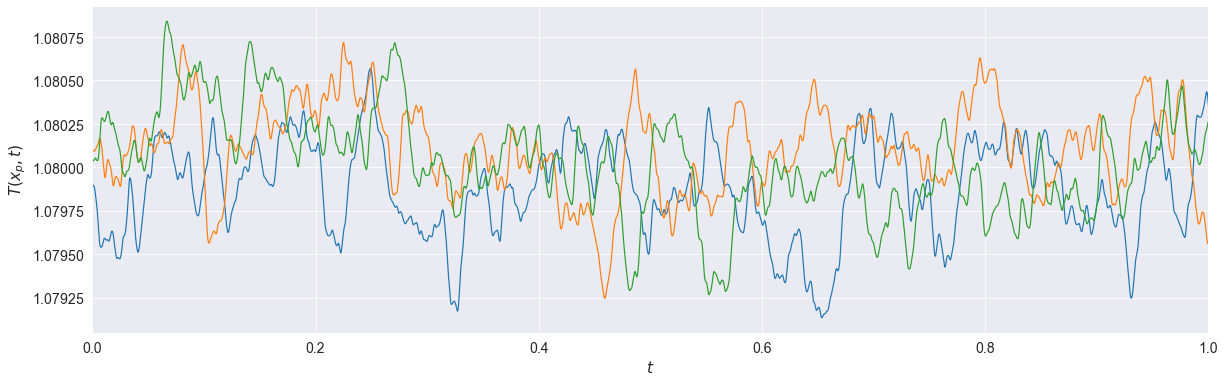

In [10]:
graficar_ensamble(sol_fourier, etiqueta = modelo)

Solución

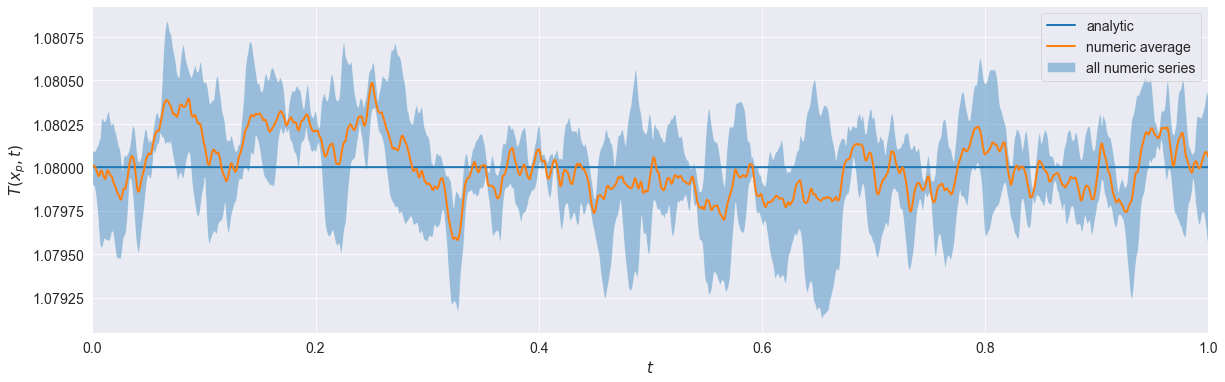

In [11]:
graficar_solucion(sol_fourier, etiqueta = modelo)

Histograma

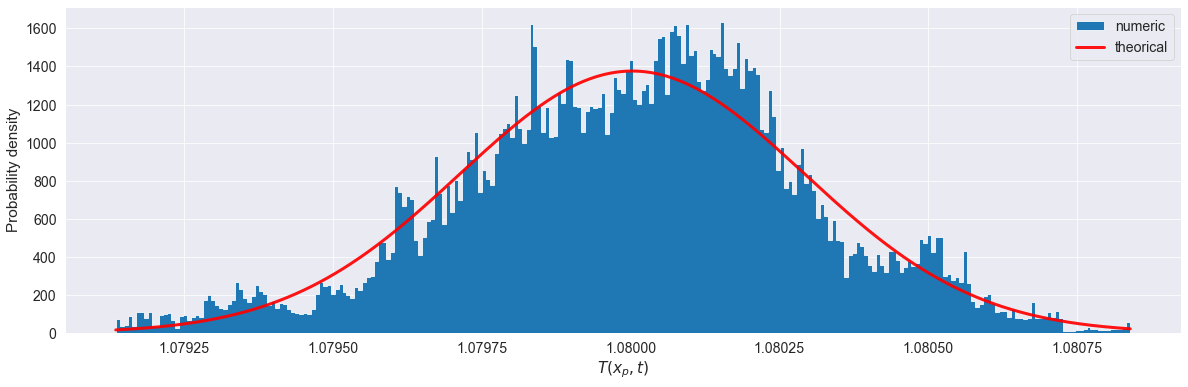

In [12]:
graficar_histograma(sol_fourier, etiqueta = modelo)